<a href="https://colab.research.google.com/github/Prachii26/DeepLearningCMPE258/blob/main/Execute%20Colabs%20and%20Explanation%20Video/Colabs/PrachiGupta_C8_linear_algebra_for_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔢 Linear Algebra for Deep Learning

## A Beginner-Friendly, Zero-to-Hero Guide

---

**Welcome!** This notebook will teach you the essential linear algebra concepts that power deep learning. Every neural network operation - from a simple forward pass to complex attention mechanisms - relies on linear algebra.

### 🎯 What You'll Learn

| Section | Topic | Deep Learning Connection |
|---------|-------|-------------------------|
| 1 | Scalars, Vectors, Matrices, Tensors | Data representation |
| 2 | Vector Operations | Embeddings, attention scores |
| 3 | Matrix Operations | Layer transformations |
| 4 | Matrix Multiplication | Forward pass, weights |
| 5 | Transpose, Inverse, Determinant | Backpropagation, regularization |
| 6 | Eigenvalues & Eigenvectors | PCA, stability analysis |
| 7 | Norms & Distances | Loss functions, regularization |

### 🧠 Why Linear Algebra Matters for Deep Learning

```
Input Data (X)  →  Weights (W)  →  Output (Y)
   [matrix]    ×    [matrix]   =   [matrix]
```

**Every neural network layer is fundamentally a matrix multiplication followed by a non-linear function!**

---

## ⚙️ Setup

Let's import the libraries we'll use throughout this notebook.

In [36]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# For beautiful visualizations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Setup complete!")
print(f"NumPy version: {np.__version__}")

✅ Setup complete!
NumPy version: 2.0.2


## 📚 Introduction: The Language of Deep Learning

Before we dive into the math, let's understand **why** linear algebra is the backbone of deep learning.

### The Core Insight

Neural networks process data in **batches** (multiple samples at once). Instead of processing one image at a time, we process 32, 64, or even 256 images simultaneously. This is only possible because of **matrix operations**.

```
Single sample:     x · w = y        (slow, one at a time)
Batch processing:  X @ W = Y        (fast, parallel!)
```

### A Simple Example

Let's see how a single neuron works mathematically:

In [37]:
import numpy as np

# A single neuron with 3 inputs
# This is the fundamental building block of ALL neural networks!

# Input features (e.g., 3 pixel values, or 3 sensor readings)
inputs = np.array([1.5, 2.0, 0.5])

# Weights (learned during training)
weights = np.array([0.4, 0.6, -0.2])

# Bias (also learned)
bias = 0.1

# The neuron's computation: weighted sum + bias
# This is a DOT PRODUCT - fundamental linear algebra!
output = np.dot(inputs, weights) + bias

print("🧮 Single Neuron Computation")
print("="*40)
print(f"Inputs:  {inputs}")
print(f"Weights: {weights}")
print(f"Bias:    {bias}")
print(f"\nOutput = inputs · weights + bias")
print(f"       = ({inputs[0]}×{weights[0]}) + ({inputs[1]}×{weights[1]}) + ({inputs[2]}×{weights[2]}) + {bias}")
print(f"       = {inputs[0]*weights[0]:.2f} + {inputs[1]*weights[1]:.2f} + {inputs[2]*weights[2]:.2f} + {bias}")
print(f"       = {output:.2f}")

🧮 Single Neuron Computation
Inputs:  [1.5 2.  0.5]
Weights: [ 0.4  0.6 -0.2]
Bias:    0.1

Output = inputs · weights + bias
       = (1.5×0.4) + (2.0×0.6) + (0.5×-0.2) + 0.1
       = 0.60 + 1.20 + -0.10 + 0.1
       = 1.80


/tmp/ipython-input-1670788760.py:39: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1670788760.py:39: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1670788760.py:39: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **

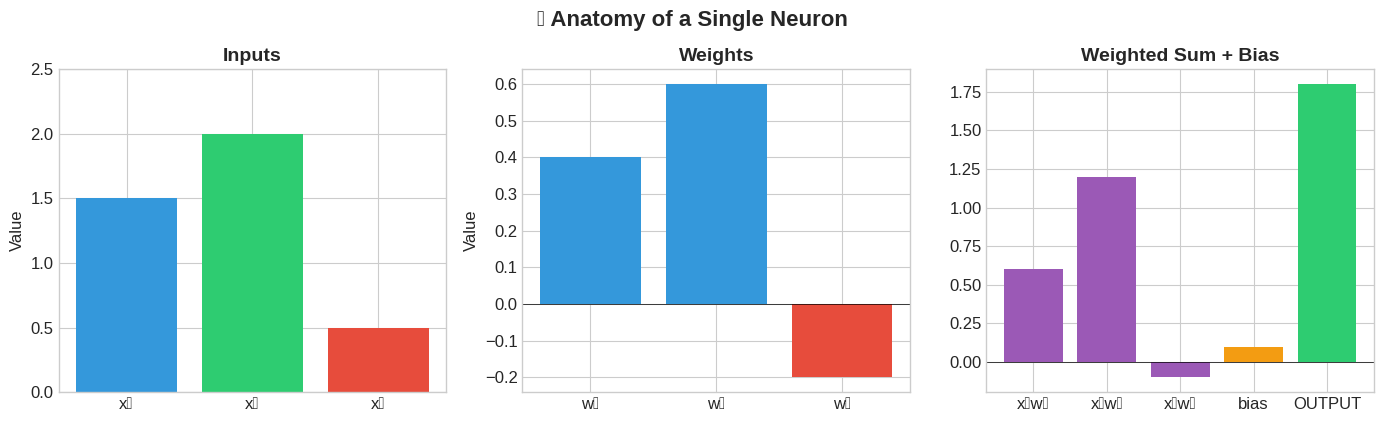


💡 Key Insight: The dot product measures how 'aligned' two vectors are!
   Large positive → vectors point same direction → strong activation
   Large negative → vectors point opposite → strong negative activation
   Near zero → vectors are perpendicular → weak activation


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Let's visualize what just happened
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot 1: Inputs
inputs = np.array([1.5, 2.0, 0.5]) # Ensure inputs are defined
axes[0].bar(['x₁', 'x₂', 'x₃'], inputs, color=['#3498db', '#2ecc71', '#e74c3c'])
axes[0].set_title('Inputs', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].set_ylim(0, 2.5)

# Plot 2: Weights
weights = np.array([0.4, 0.6, -0.2]) # Ensure weights are defined
colors = ['#3498db' if w >= 0 else '#e74c3c' for w in weights]
axes[1].bar(['w₁', 'w₂', 'w₃'], weights, color=colors)
axes[1].set_title('Weights', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Value')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Plot 3: The computation
# Ensure inputs, weights, bias are defined or derived from QXzEUUnRP793
inputs = np.array([1.5, 2.0, 0.5])
weights = np.array([0.4, 0.6, -0.2])
bias = 0.1
output = np.dot(inputs, weights) + bias # Recalculate output

products = inputs * weights
x_pos = np.arange(5)
values = list(products) + [bias, output]
colors = ['#9b59b6', '#9b59b6', '#9b59b6', '#f39c12', '#2ecc71']
axes[2].bar(x_pos, values, color=colors)
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(['x₁w₁', 'x₂w₂', 'x₃w₃', 'bias', 'OUTPUT'])
axes[2].set_title('Weighted Sum + Bias', fontsize=14, fontweight='bold')
axes[2].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.suptitle('🧠 Anatomy of a Single Neuron', fontsize=16, fontweight='bold', y=1.05)
plt.show()

print("\n💡 Key Insight: The dot product measures how 'aligned' two vectors are!")
print("   Large positive → vectors point same direction → strong activation")
print("   Large negative → vectors point opposite → strong negative activation")
print("   Near zero → vectors are perpendicular → weak activation")

---

### 🎓 What's Next?

Now that you've seen the fundamental operation of deep learning (the dot product), we'll systematically build up your linear algebra knowledge:

1. **Scalars → Vectors → Matrices → Tensors** (the data structures)
2. **Operations** (what we can do with them)
3. **Properties** (special characteristics that matter for DL)

Let's begin! 🚀

---

## 1️⃣ The Building Blocks: Scalars, Vectors, Matrices, and Tensors

In deep learning, data has **dimensions**. Understanding these is crucial:

| Structure | Dimensions | Example in Deep Learning |
|-----------|------------|-------------------------|
| **Scalar** | 0D (single number) | Learning rate, loss value |
| **Vector** | 1D (list of numbers) | Single sample features, bias |
| **Matrix** | 2D (table of numbers) | Weight matrix, batch of 1D samples |
| **Tensor** | 3D+ (multi-dimensional) | Images, sequences, batches |

Let's explore each one!

### 🔵 Scalars (0-Dimensional)

A **scalar** is just a single number. In deep learning, scalars represent:
- Learning rate (α = 0.001)
- Loss value (L = 2.45)
- Regularization strength (λ = 0.01)

In [39]:
import numpy as np

# Scalars in NumPy
learning_rate = 0.001
loss = 2.45
temperature = 1.0  # Used in softmax scaling

print("📊 Scalars in Deep Learning")
print("="*40)
print(f"Learning rate (α): {learning_rate}")
print(f"Loss value (L): {loss}")
print(f"Temperature (T): {temperature}")
print(f"\nNumPy scalar shape: {np.array(learning_rate).shape}")  # () means 0-dimensional!

📊 Scalars in Deep Learning
Learning rate (α): 0.001
Loss value (L): 2.45
Temperature (T): 1.0

NumPy scalar shape: ()


### 🔷 Vectors (1-Dimensional)

A **vector** is an ordered list of numbers. In deep learning:
- **Feature vector**: A single sample's attributes
- **Bias vector**: One bias per neuron in a layer  
- **Embedding**: A word or entity represented as numbers
- **Gradient**: Direction of steepest loss increase

In [40]:
import numpy as np

# Vectors in NumPy
# A single data sample with 4 features
sample = np.array([5.1, 3.5, 1.4, 0.2])  # e.g., Iris flower measurements

# Bias vector for a layer with 3 neurons
bias = np.array([0.1, -0.05, 0.2])

# Word embedding (simplified - real ones have 100-1000+ dimensions)
word_embedding = np.array([0.2, -0.5, 0.8, 0.1, -0.3])

print("📊 Vectors in Deep Learning")
print("="*40)
print(f"Feature vector: {sample}")
print(f"  Shape: {sample.shape}  → 4 elements, 1 dimension")
print(f"\nBias vector: {bias}")
print(f"  Shape: {bias.shape}  → 3 neurons in the layer")
print(f"\nWord embedding for 'king': {word_embedding}")
print(f"  Shape: {word_embedding.shape}  → 5-dimensional embedding space")

📊 Vectors in Deep Learning
Feature vector: [5.1 3.5 1.4 0.2]
  Shape: (4,)  → 4 elements, 1 dimension

Bias vector: [ 0.1  -0.05  0.2 ]
  Shape: (3,)  → 3 neurons in the layer

Word embedding for 'king': [ 0.2 -0.5  0.8  0.1 -0.3]
  Shape: (5,)  → 5-dimensional embedding space


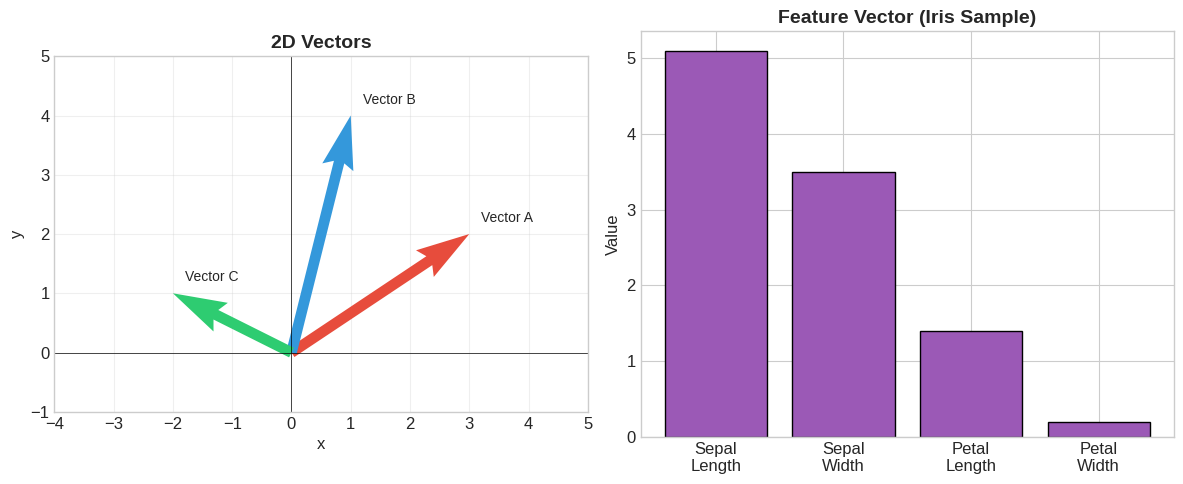


💡 Key Insight: Vectors represent points OR directions in space!
   In DL: Each dimension is a feature, and similar data points have similar vectors.


In [41]:
import numpy as np
import matplotlib.pyplot as plt

# A single data sample with 4 features (copied from cell IcSWAlENP793)
sample = np.array([5.1, 3.5, 1.4, 0.2])  # e.g., Iris flower measurements

# Visualizing vectors
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 2D vector visualization
ax1 = axes[0]
vectors_2d = np.array([[3, 2], [1, 4], [-2, 1]])
colors = ['#e74c3c', '#3498db', '#2ecc71']
labels = ['Vector A', 'Vector B', 'Vector C']

for vec, color, label in zip(vectors_2d, colors, labels):
    ax1.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
               color=color, width=0.02, label=label)
    ax1.annotate(label, xy=(vec[0], vec[1]), xytext=(vec[0]+0.2, vec[1]+0.2), fontsize=10)

ax1.set_xlim(-4, 5)
ax1.set_ylim(-1, 5)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.set_title('2D Vectors', fontsize=14, fontweight='bold')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Feature vector bar chart
ax2 = axes[1]
features = ['Sepal\nLength', 'Sepal\nWidth', 'Petal\nLength', 'Petal\nWidth']
ax2.bar(features, sample, color='#9b59b6', edgecolor='black')
ax2.set_title('Feature Vector (Iris Sample)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Value')

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: Vectors represent points OR directions in space!")
print("   In DL: Each dimension is a feature, and similar data points have similar vectors.")

### 🟩 Matrices (2-Dimensional)

A **matrix** is a 2D grid of numbers (rows × columns). In deep learning:
- **Weight matrix**: Connects two layers (input_dim × output_dim)
- **Batch of samples**: Multiple samples stacked (batch_size × features)
- **Attention scores**: Query-Key similarities (seq_len × seq_len)

```
        Features →
      ┌─────────────────┐
  B   │ sample 1 data   │
  a   │ sample 2 data   │
  t   │ sample 3 data   │
  c   │ sample 4 data   │
  h   └─────────────────┘
  ↓
```

In [42]:
import numpy as np

# Matrices in NumPy

# Weight matrix: connects 4-input layer to 3-output layer
W = np.array([
    [0.1, 0.2, -0.1],    # weights from input 1 to outputs 1,2,3
    [0.4, -0.2, 0.3],    # weights from input 2 to outputs 1,2,3
    [-0.1, 0.5, 0.2],    # weights from input 3 to outputs 1,2,3
    [0.3, 0.1, -0.4]     # weights from input 4 to outputs 1,2,3
])

# Batch of 3 samples, each with 4 features
X_batch = np.array([
    [5.1, 3.5, 1.4, 0.2],  # sample 1
    [4.9, 3.0, 1.4, 0.2],  # sample 2
    [6.2, 2.9, 4.3, 1.3]   # sample 3
])

print("📊 Matrices in Deep Learning")
print("="*40)
print(f"Weight matrix W:")
print(W)
print(f"  Shape: {W.shape}  → 4 inputs, 3 outputs")
print(f"\nBatch of samples X:")
print(X_batch)
print(f"  Shape: {X_batch.shape}  → 3 samples, 4 features each")

# The magic: process entire batch at once!
output = X_batch @ W  # Matrix multiplication
print(f"\nOutput (X @ W):")
print(output)
print(f"  Shape: {output.shape}  → 3 samples, 3 outputs each")

📊 Matrices in Deep Learning
Weight matrix W:
[[ 0.1  0.2 -0.1]
 [ 0.4 -0.2  0.3]
 [-0.1  0.5  0.2]
 [ 0.3  0.1 -0.4]]
  Shape: (4, 3)  → 4 inputs, 3 outputs

Batch of samples X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [6.2 2.9 4.3 1.3]]
  Shape: (3, 4)  → 3 samples, 4 features each

Output (X @ W):
[[1.83 1.04 0.74]
 [1.61 1.1  0.61]
 [1.74 2.94 0.59]]
  Shape: (3, 3)  → 3 samples, 3 outputs each


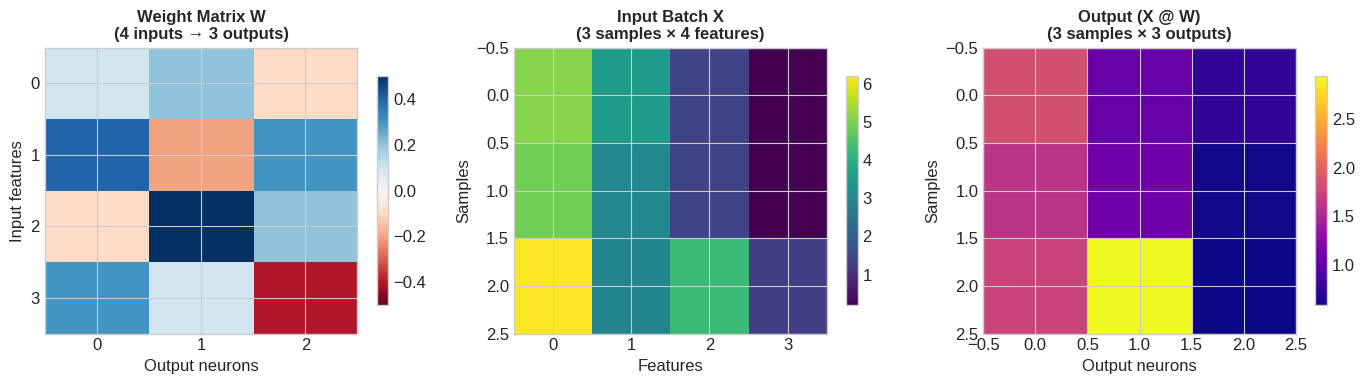


💡 Key Insight: Matrix multiplication transforms the ENTIRE batch at once!
   This is why GPUs are essential - they're optimized for matrix operations.


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Weight matrix: connects 4-input layer to 3-output layer
W = np.array([
    [0.1, 0.2, -0.1],    # weights from input 1 to outputs 1,2,3
    [0.4, -0.2, 0.3],    # weights from input 2 to outputs 1,2,3
    [-0.1, 0.5, 0.2],    # weights from input 3 to outputs 1,2,3
    [0.3, 0.1, -0.4]     # weights from input 4 to outputs 1,2,3
])

# Batch of 3 samples, each with 4 features
X_batch = np.array([
    [5.1, 3.5, 1.4, 0.2],  # sample 1
    [4.9, 3.0, 1.4, 0.2],  # sample 2
    [6.2, 2.9, 4.3, 1.3]   # sample 3
])

# The magic: process entire batch at once!
output = X_batch @ W  # Matrix multiplication

# Visualizing matrices as heatmaps
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Weight matrix
im1 = axes[0].imshow(W, cmap='RdBu', aspect='auto', vmin=-0.5, vmax=0.5)
axes[0].set_title('Weight Matrix W\n(4 inputs → 3 outputs)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Output neurons')
axes[0].set_ylabel('Input features')
axes[0].set_xticks([0, 1, 2])
axes[0].set_yticks([0, 1, 2, 3])
plt.colorbar(im1, ax=axes[0], shrink=0.8)

# Input batch
im2 = axes[1].imshow(X_batch, cmap='viridis', aspect='auto')
axes[1].set_title('Input Batch X\n(3 samples × 4 features)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Samples')
plt.colorbar(im2, ax=axes[1], shrink=0.8)

# Output
im3 = axes[2].imshow(output, cmap='plasma', aspect='auto')
axes[2].set_title('Output (X @ W)\n(3 samples × 3 outputs)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Output neurons')
axes[2].set_ylabel('Samples')
plt.colorbar(im3, ax=axes[2], shrink=0.8)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: Matrix multiplication transforms the ENTIRE batch at once!")
print("   This is why GPUs are essential - they're optimized for matrix operations.")

### 🟧 Tensors (3+ Dimensions)

A **tensor** is the generalization to 3 or more dimensions. In deep learning:
- **3D Tensor**: Batch of sequences (batch × time × features) - NLP
- **4D Tensor**: Batch of images (batch × height × width × channels) - Computer Vision
- **5D Tensor**: Batch of videos (batch × time × height × width × channels)

```
Common shapes:
- NLP:    (32, 100, 768)     = 32 sentences, 100 tokens each, 768-dim embeddings
- Images: (32, 224, 224, 3)  = 32 images, 224×224 pixels, RGB channels
- Video:  (8, 30, 224, 224, 3) = 8 videos, 30 frames, 224×224, RGB
```

In [44]:
import numpy as np

# Tensors in NumPy

# 3D Tensor: Batch of text sequences
# Shape: (batch_size, sequence_length, embedding_dim)
text_batch = np.random.randn(2, 4, 3)  # 2 sentences, 4 words each, 3-dim embeddings

print("📊 3D Tensor: Text Batch")
print("="*40)
print(f"Shape: {text_batch.shape}")
print(f"  → 2 sentences")
print(f"  → 4 words per sentence")
print(f"  → 3-dimensional word embeddings")
print(f"\nSentence 1 embeddings:")
print(text_batch[0])

# 4D Tensor: Batch of images
# Shape: (batch_size, height, width, channels)
image_batch = np.random.randint(0, 256, size=(2, 4, 4, 3), dtype=np.uint8)

print(f"\n📊 4D Tensor: Image Batch")
print("="*40)
print(f"Shape: {image_batch.shape}")
print(f"  → 2 images")
print(f"  → 4×4 pixels")
print(f"  → 3 color channels (RGB)")
print(f"\nImage 1 - Red channel:")
print(image_batch[0, :, :, 0])

📊 3D Tensor: Text Batch
Shape: (2, 4, 3)
  → 2 sentences
  → 4 words per sentence
  → 3-dimensional word embeddings

Sentence 1 embeddings:
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]]

📊 4D Tensor: Image Batch
Shape: (2, 4, 4, 3)
  → 2 images
  → 4×4 pixels
  → 3 color channels (RGB)

Image 1 - Red channel:
[[ 63 151 125  44]
 [228 220 136 162]
 [ 20  43  83  56]
 [ 17   3 234  34]]


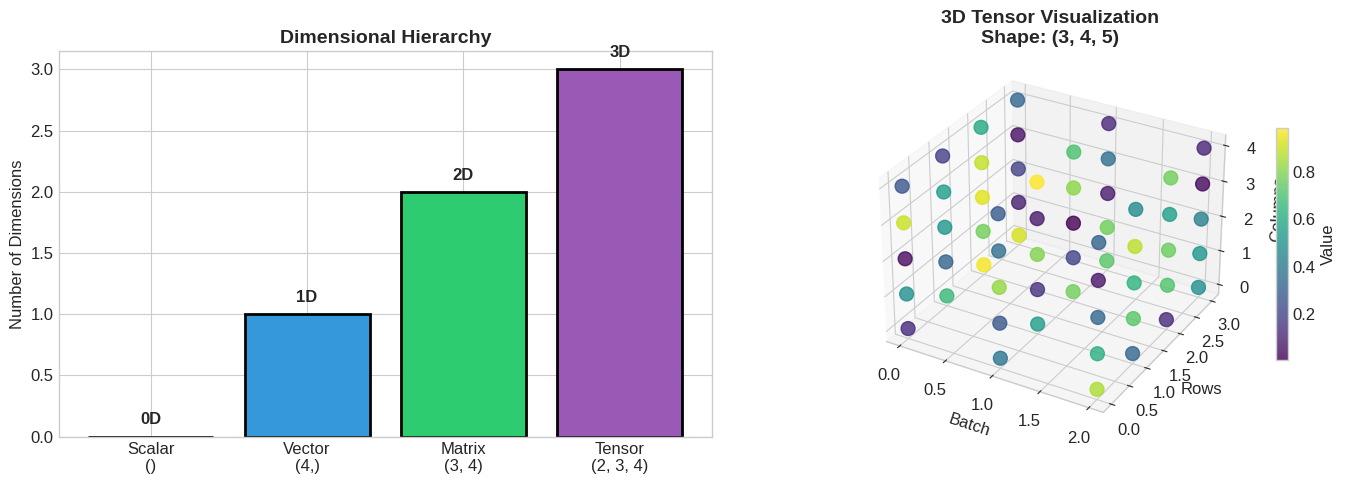


💡 Key Insight: Deep learning is all about tensor transformations!
   Input tensor → Layer → Output tensor → Layer → ... → Predictions


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualizing tensor dimensions
fig = plt.figure(figsize=(14, 5))

# Left: Scalar -> Vector -> Matrix -> Tensor hierarchy
ax1 = fig.add_subplot(121)
shapes = ['Scalar\n()', 'Vector\n(4,)', 'Matrix\n(3, 4)', 'Tensor\n(2, 3, 4)']
dims = [0, 1, 2, 3]
colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6']

bars = ax1.bar(shapes, dims, color=colors, edgecolor='black', linewidth=2)
ax1.set_ylabel('Number of Dimensions', fontsize=12)
ax1.set_title('Dimensional Hierarchy', fontsize=14, fontweight='bold')

for bar, d in zip(bars, dims):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{d}D', ha='center', fontsize=12, fontweight='bold')

# Right: 3D visualization of a tensor
ax2 = fig.add_subplot(122, projection='3d')

# Create a small 3D tensor to visualize
tensor_3d = np.random.rand(3, 4, 5)

# Plot as scatter with colors representing values
x, y, z = np.meshgrid(range(3), range(4), range(5), indexing='ij')
colors = tensor_3d.flatten()

scatter = ax2.scatter(x.flatten(), y.flatten(), z.flatten(),
                      c=colors, cmap='viridis', s=100, alpha=0.8)

ax2.set_xlabel('Batch')
ax2.set_ylabel('Rows')
ax2.set_zlabel('Columns')
ax2.set_title('3D Tensor Visualization\nShape: (3, 4, 5)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=ax2, shrink=0.6, label='Value')

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: Deep learning is all about tensor transformations!")
print("   Input tensor → Layer → Output tensor → Layer → ... → Predictions")

### 🎯 Deep Learning Connection: Data Shapes in Real Networks

Let's see how these structures appear in actual neural network architectures:

In [46]:
import numpy as np

# Real-world tensor shapes in deep learning
print("🧠 Tensor Shapes in Popular Deep Learning Tasks")
print("="*60)

shapes = {
    "MNIST digit classification": {
        "Input": "(64, 28, 28, 1)",
        "After flatten": "(64, 784)",
        "Output": "(64, 10)"
    },
    "ImageNet (ResNet)": {
        "Input": "(32, 224, 224, 3)",
        "After conv layers": "(32, 7, 7, 2048)",
        "Output": "(32, 1000)"
    },
    "Text classification (BERT)": {
        "Input tokens": "(16, 512)",
        "After embedding": "(16, 512, 768)",
        "Output": "(16, 2)"
    },
    "Language model (GPT)": {
        "Input tokens": "(8, 1024)",
        "Embeddings": "(8, 1024, 1024)",
        "Attention": "(8, 16, 1024, 1024)",
        "Output logits": "(8, 1024, 50257)"
    }
}

for task, dims in shapes.items():
    print(f"\n📌 {task}")
    for stage, shape in dims.items():
        print(f"   {stage}: {shape}")

print("="*60)
print("💡 Notice: The first dimension is almost always BATCH SIZE!")
print("   This enables parallel processing of multiple samples.")

🧠 Tensor Shapes in Popular Deep Learning Tasks

📌 MNIST digit classification
   Input: (64, 28, 28, 1)
   After flatten: (64, 784)
   Output: (64, 10)

📌 ImageNet (ResNet)
   Input: (32, 224, 224, 3)
   After conv layers: (32, 7, 7, 2048)
   Output: (32, 1000)

📌 Text classification (BERT)
   Input tokens: (16, 512)
   After embedding: (16, 512, 768)
   Output: (16, 2)

📌 Language model (GPT)
   Input tokens: (8, 1024)
   Embeddings: (8, 1024, 1024)
   Attention: (8, 16, 1024, 1024)
   Output logits: (8, 1024, 50257)
💡 Notice: The first dimension is almost always BATCH SIZE!
   This enables parallel processing of multiple samples.


---

✅ **Section 1 Complete!** You now understand:
- Scalars (0D): Single values like learning rate
- Vectors (1D): Feature representations, embeddings
- Matrices (2D): Weight matrices, batches of 1D data
- Tensors (3D+): Images, sequences, video

Next up: **Vector Operations** - the fundamental calculations!

---

## 2️⃣ Vector Operations

Vectors are the workhorses of deep learning. Let's master the essential operations:

| Operation | Symbol | Deep Learning Use |
|-----------|--------|-------------------|
| Addition | **a** + **b** | Residual connections, bias addition |
| Scalar Multiplication | c · **a** | Learning rate scaling, normalization |
| Dot Product | **a** · **b** | Attention scores, neuron activation |
| Element-wise Product | **a** ⊙ **b** | Gating mechanisms (LSTM, GRU) |

### ➕ Vector Addition

Adding vectors means adding corresponding elements. In deep learning, this is used for:
- **Bias addition**: output = Wx + **b**
- **Residual connections**: output = F(x) + **x** (skip connections in ResNet)

In [47]:
import numpy as np

# Vector Addition
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Element-wise addition
c = a + b

print("➕ Vector Addition")
print("="*40)
print(f"a = {a}")
print(f"b = {b}")
print(f"a + b = {c}")
print(f"\nElement-wise: [{a[0]}+{b[0]}, {a[1]}+{b[1]}, {a[2]}+{b[2]}] = {c}")

# Deep Learning Example: Bias Addition
layer_output = np.array([0.5, -0.2, 0.8])  # Result of Wx
bias = np.array([0.1, 0.1, 0.1])           # Learned bias

pre_activation = layer_output + bias
print(f"\n🧠 Deep Learning: Bias Addition")
print(f"Layer output (Wx):  {layer_output}")
print(f"Bias (b):           {bias}")
print(f"Pre-activation (Wx+b): {pre_activation}")

➕ Vector Addition
a = [1 2 3]
b = [4 5 6]
a + b = [5 7 9]

Element-wise: [1+4, 2+5, 3+6] = [5 7 9]

🧠 Deep Learning: Bias Addition
Layer output (Wx):  [ 0.5 -0.2  0.8]
Bias (b):           [0.1 0.1 0.1]
Pre-activation (Wx+b): [ 0.6 -0.1  0.9]


/tmp/ipython-input-1569273196.py:53: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Liberation Sans.
  plt.tight_layout()


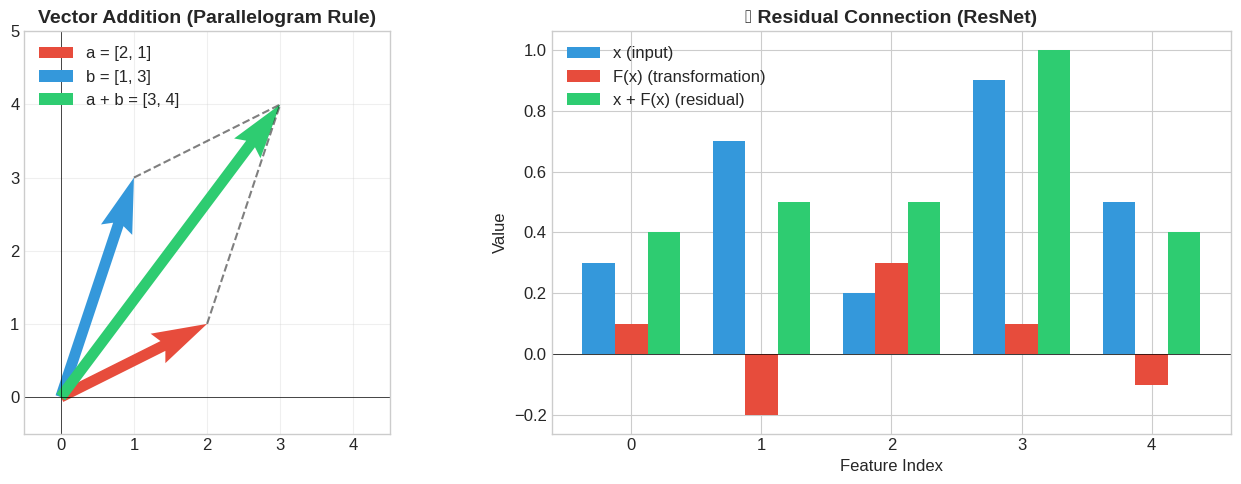


💡 Key Insight: Residual connections allow gradients to flow directly!
   This solved the vanishing gradient problem in very deep networks.


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Visualizing vector addition in 2D
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Geometric interpretation
ax1 = axes[0]
v1 = np.array([2, 1])
v2 = np.array([1, 3])
v_sum = v1 + v2

# Draw vectors
ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1,
           color='#e74c3c', width=0.03, label='a = [2, 1]')
ax1.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1,
           color='#3498db', width=0.03, label='b = [1, 3]')
ax1.quiver(0, 0, v_sum[0], v_sum[1], angles='xy', scale_units='xy', scale=1,
           color='#2ecc71', width=0.03, label='a + b = [3, 4]')

# Draw the parallelogram
ax1.plot([v1[0], v_sum[0]], [v1[1], v_sum[1]], 'k--', alpha=0.5)
ax1.plot([v2[0], v_sum[0]], [v2[1], v_sum[1]], 'k--', alpha=0.5)

ax1.set_xlim(-0.5, 4.5)
ax1.set_ylim(-0.5, 5)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.legend(loc='upper left')
ax1.set_title('Vector Addition (Parallelogram Rule)', fontsize=14, fontweight='bold')

# Right: Residual connection visualization
ax2 = axes[1]
x_input = np.array([0.3, 0.7, 0.2, 0.9, 0.5])
f_x = np.array([0.1, -0.2, 0.3, 0.1, -0.1])  # Learned transformation
residual = x_input + f_x  # Skip connection

x_pos = np.arange(5)
width = 0.25

bars1 = ax2.bar(x_pos - width, x_input, width, label='x (input)', color='#3498db')
bars2 = ax2.bar(x_pos, f_x, width, label='F(x) (transformation)', color='#e74c3c')
bars3 = ax2.bar(x_pos + width, residual, width, label='x + F(x) (residual)', color='#2ecc71')

ax2.set_xlabel('Feature Index')
ax2.set_ylabel('Value')
ax2.set_title('🧠 Residual Connection (ResNet)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.axhline(y=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: Residual connections allow gradients to flow directly!")
print("   This solved the vanishing gradient problem in very deep networks.")

### ✖️ Scalar Multiplication

Multiplying a vector by a scalar scales every element. In deep learning:
- **Learning rate**: gradients scaled before updating weights
- **Gradient scaling**: prevent overflow in mixed precision training
- **Attention scaling**: divide by √d_k in transformers

In [49]:
import numpy as np

# Scalar Multiplication
v = np.array([2, 4, 6])
scalar = 0.5

scaled = scalar * v

print("✖️ Scalar Multiplication")
print("="*40)
print(f"v = {v}")
print(f"scalar = {scalar}")
print(f"scalar × v = {scaled}")

# Deep Learning Example: Learning Rate
gradient = np.array([0.5, -1.2, 0.8])  # Computed gradients
learning_rate = 0.01

weight_update = learning_rate * gradient
print(f"\n🧠 Deep Learning: Weight Update")
print(f"Gradient (∇L):       {gradient}")
print(f"Learning rate (η):   {learning_rate}")
print(f"Weight update (η·∇L): {weight_update}")
print(f"\nNew weights = old weights - η·∇L  (gradient descent!)")

✖️ Scalar Multiplication
v = [2 4 6]
scalar = 0.5
scalar × v = [1. 2. 3.]

🧠 Deep Learning: Weight Update
Gradient (∇L):       [ 0.5 -1.2  0.8]
Learning rate (η):   0.01
Weight update (η·∇L): [ 0.005 -0.012  0.008]

New weights = old weights - η·∇L  (gradient descent!)


### 🎯 Dot Product (Inner Product) - THE MOST IMPORTANT OPERATION!

The **dot product** is the foundation of neural networks:

$$\mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^{n} a_i \cdot b_i = a_1b_1 + a_2b_2 + ... + a_nb_n$$

**Geometric meaning**: $\mathbf{a} \cdot \mathbf{b} = |\mathbf{a}| \cdot |\mathbf{b}| \cdot \cos(\theta)$

This measures:
- **Similarity** between vectors (cosine similarity in embeddings)
- **Projection** of one vector onto another
- **Weighted sum** in neurons

In [50]:
import numpy as np

# Dot Product - Multiple ways to compute
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Method 1: np.dot
dot1 = np.dot(a, b)

# Method 2: @ operator
dot2 = a @ b

# Method 3: Manual (sum of products)
dot3 = np.sum(a * b)

print("🎯 Dot Product Computation")
print("="*40)
print(f"a = {a}")
print(f"b = {b}")
print(f"\nStep by step:")
print(f"  {a[0]}×{b[0]} + {a[1]}×{b[1]} + {a[2]}×{b[2]}")
print(f"= {a[0]*b[0]} + {a[1]*b[1]} + {a[2]*b[2]}")
print(f"= {dot1}")
print(f"\nUsing np.dot(a, b): {dot1}")
print(f"Using a @ b:        {dot2}")
print(f"Using sum(a * b):   {dot3}")

🎯 Dot Product Computation
a = [1 2 3]
b = [4 5 6]

Step by step:
  1×4 + 2×5 + 3×6
= 4 + 10 + 18
= 32

Using np.dot(a, b): 32
Using a @ b:        32
Using sum(a * b):   32


/tmp/ipython-input-2555471138.py:60: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2555471138.py:60: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2555471138.py:60: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2555471138.py:60: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2555471138.py:60: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE

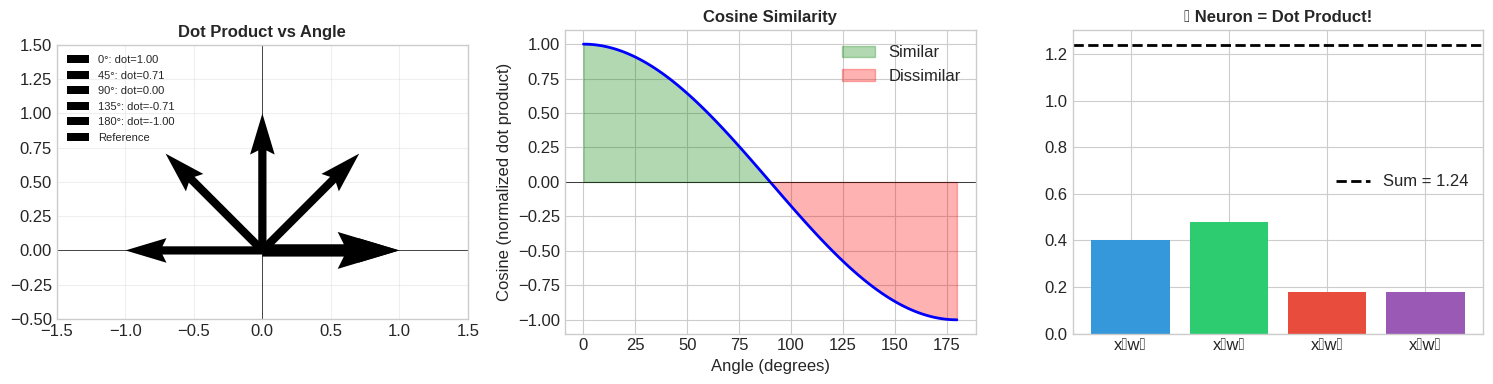


💡 Key Insight: Dot product measures ALIGNMENT between vectors!
   Same direction → positive, Perpendicular → zero, Opposite → negative


In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Visualizing dot product: Similarity and angle
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Example vectors at different angles
angles_deg = [0, 45, 90, 135, 180]
v1 = np.array([1, 0])

ax1 = axes[0]
for angle in angles_deg:
    angle_rad = np.radians(angle)
    v2 = np.array([np.cos(angle_rad), np.sin(angle_rad)])
    dot = np.dot(v1, v2)

    ax1.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1,
               width=0.02, label=f'{angle}°: dot={dot:.2f}')

ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1,
           color='black', width=0.03, label='Reference')

ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-0.5, 1.5)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.legend(loc='upper left', fontsize=8)
ax1.set_title('Dot Product vs Angle', fontsize=12, fontweight='bold')

# Cosine similarity plot
ax2 = axes[1]
angles = np.linspace(0, 180, 100)
cos_values = np.cos(np.radians(angles))
ax2.plot(angles, cos_values, 'b-', linewidth=2)
ax2.fill_between(angles, cos_values, 0, where=(cos_values > 0), alpha=0.3, color='green', label='Similar')
ax2.fill_between(angles, cos_values, 0, where=(cos_values < 0), alpha=0.3, color='red', label='Dissimilar')
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.set_xlabel('Angle (degrees)')
ax2.set_ylabel('Cosine (normalized dot product)')
ax2.set_title('Cosine Similarity', fontsize=12, fontweight='bold')
ax2.legend()

# Neuron interpretation
ax3 = axes[2]
inputs = np.array([0.8, 0.6, 0.9, 0.3])
weights = np.array([0.5, 0.8, 0.2, 0.6])
products = inputs * weights
output = np.sum(products)

x_pos = np.arange(4)
bars = ax3.bar(x_pos, products, color=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6'])
ax3.axhline(y=output, color='black', linestyle='--', linewidth=2, label=f'Sum = {output:.2f}')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(['x₁w₁', 'x₂w₂', 'x₃w₃', 'x₄w₄'])
ax3.set_title('🧠 Neuron = Dot Product!', fontsize=12, fontweight='bold')
ax3.legend()

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: Dot product measures ALIGNMENT between vectors!")
print("   Same direction → positive, Perpendicular → zero, Opposite → negative")

In [52]:
import numpy as np

# Deep Learning Application: Cosine Similarity for Word Embeddings
# Simplified word embeddings (real ones are 100-1000+ dimensions)

embeddings = {
    'king':   np.array([0.8, 0.2, 0.9, 0.1]),
    'queen':  np.array([0.7, 0.3, 0.8, 0.2]),
    'man':    np.array([0.9, 0.1, 0.2, 0.1]),
    'woman':  np.array([0.8, 0.2, 0.1, 0.2]),
    'apple':  np.array([0.1, 0.9, 0.1, 0.8]),
    'orange': np.array([0.2, 0.8, 0.1, 0.7])
}

def cosine_similarity(a, b):
    """Normalized dot product - measures similarity from -1 to 1"""
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

print("🧠 Cosine Similarity: Finding Similar Words")
print("="*50)

# Compare king with all other words
target = 'king'
print(f"\nSimilarity scores with '{target}':")
similarities = {}
for word, emb in embeddings.items():
    if word != target:
        sim = cosine_similarity(embeddings[target], emb)
        similarities[word] = sim
        print(f"  {word:8s}: {sim:.4f}")

print(f"\n✅ Most similar to 'king': {max(similarities, key=similarities.get)}")
print("   (As expected - 'queen' is most similar to 'king'!")

🧠 Cosine Similarity: Finding Similar Words

Similarity scores with 'king':
  queen   : 0.9893
  man     : 0.8141
  woman   : 0.7550
  apple   : 0.2896
  orange  : 0.3608

✅ Most similar to 'king': queen
   (As expected - 'queen' is most similar to 'king'!


### ⊙ Element-wise (Hadamard) Product

Element-wise multiplication multiplies corresponding elements WITHOUT summing. In deep learning:
- **LSTM/GRU gates**: Control information flow
- **Attention mechanisms**: Weight values by attention scores
- **Dropout**: Zero out random elements

In [53]:
import numpy as np

# Element-wise (Hadamard) Product
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])

# Element-wise multiplication (NOT dot product!)
hadamard = a * b

print("⊙ Element-wise (Hadamard) Product")
print("="*40)
print(f"a = {a}")
print(f"b = {b}")
print(f"a ⊙ b = {hadamard}")
print(f"\nNote: Result is a VECTOR, not a scalar!")
print(f"Each position: [{a[0]}×{b[0]}, {a[1]}×{b[1]}, {a[2]}×{b[2]}, {a[3]}×{b[3]}]")

# Deep Learning Example: LSTM Forget Gate
print(f"\n🧠 Deep Learning: LSTM Forget Gate")
cell_state = np.array([0.8, 0.5, 0.9, 0.3])   # Previous memory
forget_gate = np.array([0.1, 0.9, 0.8, 0.2])  # What to keep (learned)

new_cell_state = cell_state * forget_gate
print(f"Cell state (memory):     {cell_state}")
print(f"Forget gate (0=forget):  {forget_gate}")
print(f"After gating:            {new_cell_state}")
print(f"\n💡 The forget gate controls which memories to keep!")

⊙ Element-wise (Hadamard) Product
a = [1 2 3 4]
b = [5 6 7 8]
a ⊙ b = [ 5 12 21 32]

Note: Result is a VECTOR, not a scalar!
Each position: [1×5, 2×6, 3×7, 4×8]

🧠 Deep Learning: LSTM Forget Gate
Cell state (memory):     [0.8 0.5 0.9 0.3]
Forget gate (0=forget):  [0.1 0.9 0.8 0.2]
After gating:            [0.08 0.45 0.72 0.06]

💡 The forget gate controls which memories to keep!


---

✅ **Section 2 Complete!** You now understand vector operations:
- **Addition**: Residual connections, bias addition
- **Scalar multiplication**: Learning rate, gradient scaling  
- **Dot product**: Neuron computation, attention, similarity
- **Element-wise product**: Gating mechanisms

Next up: **Matrix Operations** - scaling to layers!

---

## 3️⃣ Matrix Operations

Matrices extend vector operations to 2D. In deep learning, matrices represent:
- **Weight matrices**: Transform input to output dimensions
- **Batch data**: Multiple samples processed together
- **Attention matrices**: Relationships between sequence elements

| Operation | Deep Learning Use |
|-----------|------------------|
| Matrix Addition | Layer outputs, skip connections |
| Scalar × Matrix | Scaling weights |
| Matrix-Vector | Single sample through layer |
| Matrix-Matrix | Batch processing (next section!) |

In [54]:
import numpy as np

# Matrix Addition (element-wise, same shape required)
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

C = A + B

print("➕ Matrix Addition")
print("="*40)
print("A =")
print(A)
print("\nB =")
print(B)
print("\nA + B =")
print(C)

# Deep Learning: Adding outputs from parallel paths
print("\n🧠 Deep Learning: Multi-head Attention Aggregation")
head1_output = np.array([[0.5, 0.3], [0.2, 0.8]])
head2_output = np.array([[0.1, 0.4], [0.6, 0.1]])
combined = head1_output + head2_output
print("Head 1 output + Head 2 output =")
print(combined)

➕ Matrix Addition
A =
[[1 2]
 [3 4]]

B =
[[5 6]
 [7 8]]

A + B =
[[ 6  8]
 [10 12]]

🧠 Deep Learning: Multi-head Attention Aggregation
Head 1 output + Head 2 output =
[[0.6 0.7]
 [0.8 0.9]]


In [55]:
import numpy as np

# Matrix-Vector Multiplication: A single sample through a layer
# This is a sequence of dot products!

W = np.array([
    [0.5, 0.3, 0.2],
    [0.1, 0.8, 0.4],
    [0.6, 0.2, 0.7]
])  # 3x3 weight matrix

x = np.array([1.0, 2.0, 3.0])  # Input vector (3 features)

# Matrix-vector multiplication: y = Wx
y = W @ x

print("🧠 Matrix-Vector Multiplication: One Sample Through a Layer")
print("="*55)
print(f"Weight matrix W (3 neurons × 3 inputs):")
print(W)
print(f"\nInput vector x: {x}")
print(f"\nOutput y = W @ x: {y}")

print("\n📐 Step by step (each output is a dot product with a row):")
for i in range(3):
    dot = np.dot(W[i], x)
    print(f"  y[{i}] = W[{i}] · x = {W[i]} · {x} = {dot:.1f}")

🧠 Matrix-Vector Multiplication: One Sample Through a Layer
Weight matrix W (3 neurons × 3 inputs):
[[0.5 0.3 0.2]
 [0.1 0.8 0.4]
 [0.6 0.2 0.7]]

Input vector x: [1. 2. 3.]

Output y = W @ x: [1.7 2.9 3.1]

📐 Step by step (each output is a dot product with a row):
  y[0] = W[0] · x = [0.5 0.3 0.2] · [1. 2. 3.] = 1.7
  y[1] = W[1] · x = [0.1 0.8 0.4] · [1. 2. 3.] = 2.9
  y[2] = W[2] · x = [0.6 0.2 0.7] · [1. 2. 3.] = 3.1


/tmp/ipython-input-29294380.py:53: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-29294380.py:53: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-29294380.py:53: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, 

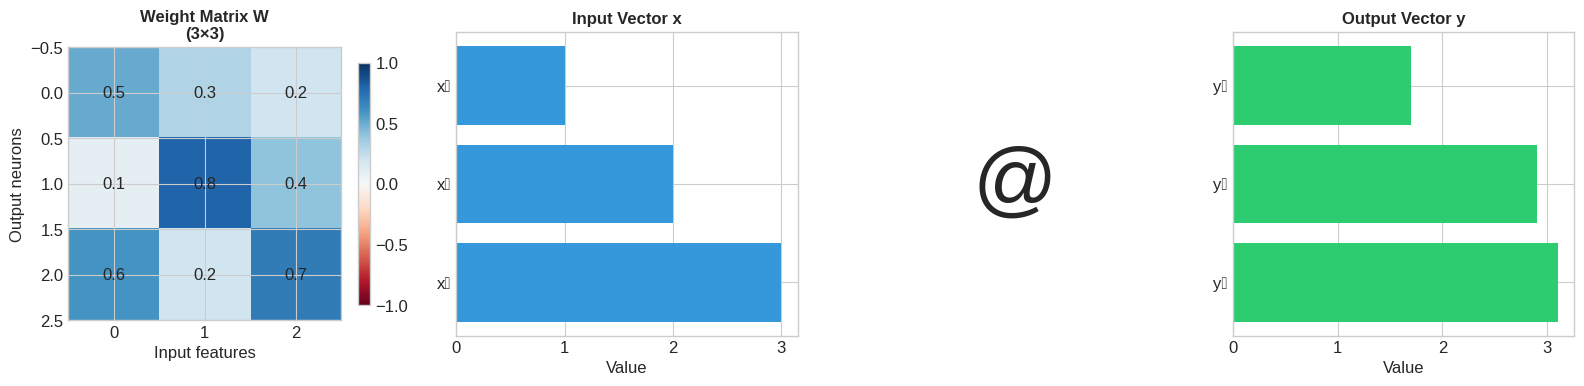


💡 Key Insight: Each output neuron computes a dot product with its row of weights!
   This is how neural network layers transform data.


In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix-Vector Multiplication: A single sample through a layer
# This is a sequence of dot products!

W = np.array(
    [[0.5, 0.3, 0.2],
     [0.1, 0.8, 0.4],
     [0.6, 0.2, 0.7]]
)  # 3x3 weight matrix

x = np.array([1.0, 2.0, 3.0])  # Input vector (3 features)

# Matrix-vector multiplication: y = Wx
y = W @ x

# Visualizing Matrix-Vector Multiplication
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Weight matrix heatmap
im0 = axes[0].imshow(W, cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_title('Weight Matrix W\n(3×3)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Input features')
axes[0].set_ylabel('Output neurons')
for i in range(3):
    for j in range(3):
        axes[0].text(j, i, f'{W[i,j]:.1f}', ha='center', va='center', fontsize=12)
plt.colorbar(im0, ax=axes[0], shrink=0.8)

# Input vector (as column)
axes[1].barh([0, 1, 2], x, color='#3498db')
axes[1].set_yticks([0, 1, 2])
axes[1].set_yticklabels(['x₁', 'x₂', 'x₃'])
axes[1].set_title('Input Vector x', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Value')
axes[1].invert_yaxis()

# @ symbol
axes[2].text(0.5, 0.5, '@', fontsize=60, ha='center', va='center')
axes[2].set_xlim(0, 1)
axes[2].set_ylim(0, 1)
axes[2].axis('off')

# Output vector
axes[3].barh([0, 1, 2], y, color='#2ecc71')
axes[3].set_yticks([0, 1, 2])
axes[3].set_yticklabels(['y₁', 'y₂', 'y₃'])
axes[3].set_title('Output Vector y', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Value')
axes[3].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: Each output neuron computes a dot product with its row of weights!")
print("   This is how neural network layers transform data.")

---

✅ **Section 3 Complete!** You now understand:
- Matrix addition (element-wise)
- Matrix-vector multiplication (layer transformation)
- How each neuron output is a dot product

Next up: **Matrix Multiplication** - the heart of batch processing!

---

## 4️⃣ Matrix Multiplication - The Heart of Deep Learning

Matrix multiplication is THE core operation in neural networks. It enables:
- **Batch processing**: Transform many samples at once
- **Layer transformations**: Map input dimensions to output dimensions
- **Efficient computation**: GPUs are optimized for this!

### The Shape Rule (CRITICAL!)

For **A @ B** to work:
```
A: (m × n)  @  B: (n × p)  =  C: (m × p)
     ↑ ↑           ↑ ↑            ↑   ↑
     └─┴───────────┘              │   │
     These MUST match!            Outer dimensions
```

**Memory trick**: The inner dimensions disappear, outer dimensions remain!

In [57]:
import numpy as np

# Matrix Multiplication Basics
A = np.array([[1, 2],
              [3, 4]])  # 2×2

B = np.array([[5, 6],
              [7, 8]])  # 2×2

C = A @ B  # or np.matmul(A, B)

print("🔢 Matrix Multiplication")
print("="*40)
print(f"A (shape {A.shape}):")
print(A)
print(f"\nB (shape {B.shape}):")
print(B)
print(f"\nC = A @ B (shape {C.shape}):")
print(C)

# Manual computation of C[0,0]
print(f"\n📐 Computing C[0,0] step by step:")
print(f"C[0,0] = A[row 0] · B[col 0]")
print(f"      = [{A[0,0]}, {A[0,1]}] · [{B[0,0]}, {B[1,0]}]")
print(f"      = {A[0,0]}×{B[0,0]} + {A[0,1]}×{B[1,0]}")
print(f"      = {A[0,0]*B[0,0]} + {A[0,1]*B[1,0]}")
print(f"      = {C[0,0]}")

🔢 Matrix Multiplication
A (shape (2, 2)):
[[1 2]
 [3 4]]

B (shape (2, 2)):
[[5 6]
 [7 8]]

C = A @ B (shape (2, 2)):
[[19 22]
 [43 50]]

📐 Computing C[0,0] step by step:
C[0,0] = A[row 0] · B[col 0]
      = [1, 2] · [5, 7]
      = 1×5 + 2×7
      = 5 + 14
      = 19


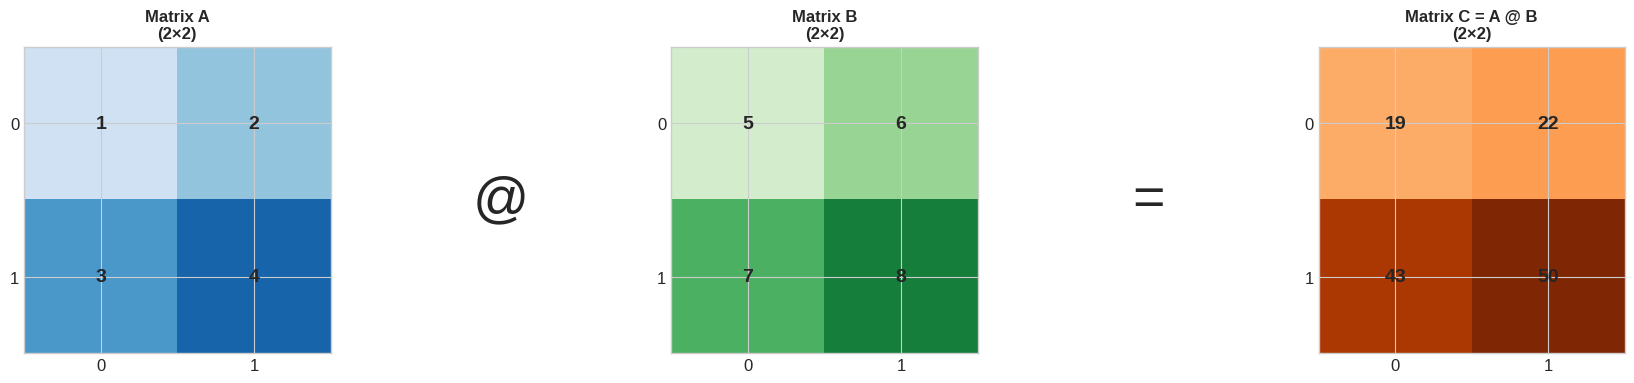


💡 Matrix multiplication rule: C[i,j] = dot product of A's row i and B's column j


In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix Multiplication Basics (defining A, B, and C here to make the cell self-contained)
A = np.array([[1, 2],
              [3, 4]])  # 2×2

B = np.array([[5, 6],
              [7, 8]])  # 2×2

C = A @ B  # or np.matmul(A, B)

# Visualizing Matrix Multiplication
fig, axes = plt.subplots(1, 5, figsize=(18, 4), gridspec_kw={'width_ratios': [1, 0.3, 1, 0.3, 1]})

# Matrix A
im0 = axes[0].imshow(A, cmap='Blues', vmin=0, vmax=5)
axes[0].set_title('Matrix A\n(2×2)', fontsize=12, fontweight='bold')
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, f'{A[i,j]}', ha='center', va='center', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])

# @ symbol
axes[1].text(0.5, 0.5, '@', fontsize=40, ha='center', va='center')
axes[1].axis('off')

# Matrix B
im2 = axes[2].imshow(B, cmap='Greens', vmin=4, vmax=9)
axes[2].set_title('Matrix B\n(2×2)', fontsize=12, fontweight='bold')
for i in range(2):
    for j in range(2):
        axes[2].text(j, i, f'{B[i,j]}', ha='center', va='center', fontsize=14, fontweight='bold')
axes[2].set_xticks([0, 1])
axes[2].set_yticks([0, 1])

# = symbol
axes[3].text(0.5, 0.5, '=', fontsize=40, ha='center', va='center')
axes[3].axis('off')

# Result C
im4 = axes[4].imshow(C, cmap='Oranges', vmin=0, vmax=50)
axes[4].set_title('Matrix C = A @ B\n(2×2)', fontsize=12, fontweight='bold')
for i in range(2):
    for j in range(2):
        axes[4].text(j, i, f'{C[i,j]}', ha='center', va='center', fontsize=14, fontweight='bold')
axes[4].set_xticks([0, 1])
axes[4].set_yticks([0, 1])

plt.tight_layout()
plt.show()

print("\n💡 Matrix multiplication rule: C[i,j] = dot product of A's row i and B's column j")

### 🧠 Deep Learning: Batch Processing a Layer

The real power of matrix multiplication: process an **entire batch** at once!

```
X @ W + b = Y
(batch, in_features) @ (in_features, out_features) + (out_features,) = (batch, out_features)
```

In [59]:
# Batch Processing: The Power of Matrix Multiplication
np.random.seed(42)

# Simulating a neural network layer
batch_size = 4
in_features = 3
out_features = 2

# Input batch: 4 samples, 3 features each
X = np.random.randn(batch_size, in_features).round(2)

# Weight matrix: transforms 3 inputs → 2 outputs
W = np.random.randn(in_features, out_features).round(2)

# Bias: one per output neuron
b = np.array([0.1, -0.1])

# Forward pass: process ENTIRE batch at once!
Y = X @ W + b

print("🚀 Batch Processing a Layer")
print("="*50)
print(f"Input batch X - shape {X.shape}:")
print(X)
print(f"\nWeight matrix W - shape {W.shape}:")
print(W)
print(f"\nBias b - shape {b.shape}: {b}")
print(f"\nOutput Y = X @ W + b - shape {Y.shape}:")
print(Y)

print(f"\n✨ We processed {batch_size} samples in ONE operation!")
print(f"   Single sample:  {in_features} multiplications × {out_features} outputs = {in_features * out_features} ops")
print(f"   Batch of {batch_size}:      {in_features * out_features * batch_size} ops, but GPU does them in parallel!")

🚀 Batch Processing a Layer
Input batch X - shape (4, 3):
[[ 0.5  -0.14  0.65]
 [ 1.52 -0.23 -0.23]
 [ 1.58  0.77 -0.47]
 [ 0.54 -0.46 -0.47]]

Weight matrix W - shape (3, 2):
[[ 0.24 -1.91]
 [-1.72 -0.56]
 [-1.01  0.31]]

Bias b - shape (2,): [ 0.1 -0.1]

Output Y = X @ W + b - shape (4, 2):
[[-0.1957 -0.7751]
 [ 1.0927 -2.9457]
 [-0.3705 -3.6947]
 [ 1.4955 -1.0195]]

✨ We processed 4 samples in ONE operation!
   Single sample:  3 multiplications × 2 outputs = 6 ops
   Batch of 4:      24 ops, but GPU does them in parallel!


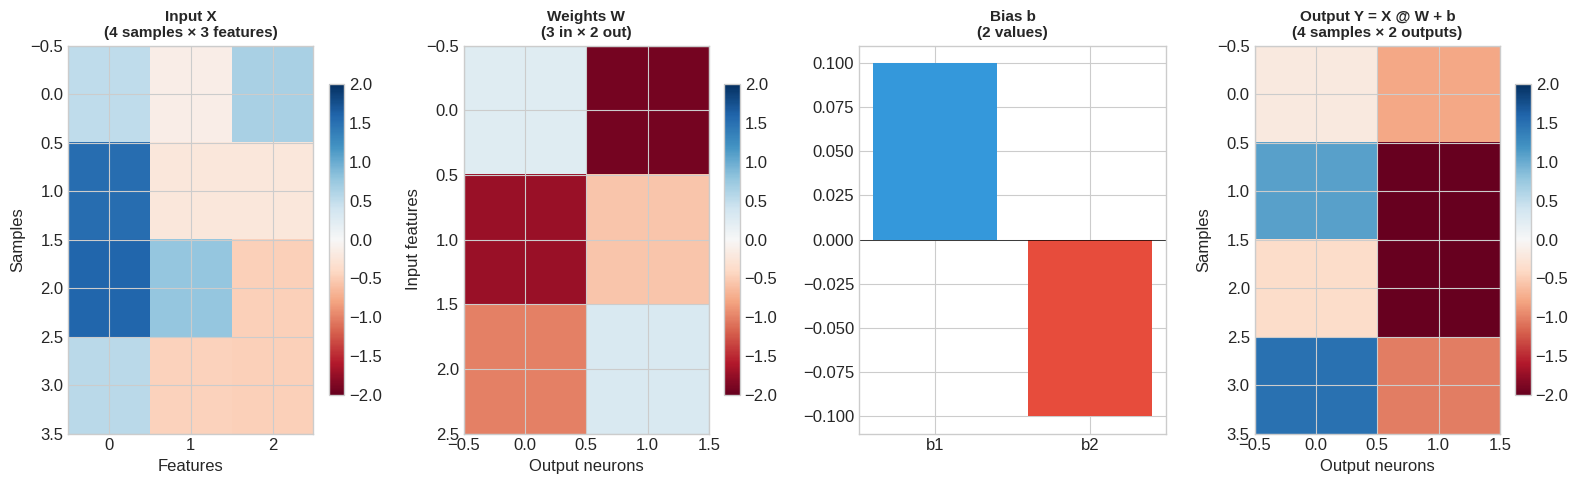


💡 This is exactly what happens in every Dense/Linear layer!
   Input → Matrix Multiply → Add Bias → (then activation function)


In [60]:
import numpy as np
import matplotlib.pyplot as plt
batch_size = 4
# --- Start of definitions from preceding cell (sNTLV05LP79y) ---
np.random.seed(42)

# Simulating a neural network layer
batch_size = 4
in_features = 3
out_features = 2

# Input batch: 4 samples, 3 features each
X = np.random.randn(batch_size, in_features).round(2)

# Weight matrix: transforms 3 inputs → 2 outputs
W = np.random.randn(in_features, out_features).round(2)

# Bias: one per output neuron
b = np.array([0.1, -0.1])

# Forward pass: process ENTIRE batch at once!
Y = X @ W + b
# --- End of definitions ---

# Visualize the batch processing
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

# Input batch
im0 = axes[0].imshow(X, cmap='RdBu', vmin=-2, vmax=2, aspect='auto')
axes[0].set_title(f'Input X\n({batch_size} samples × {in_features} features)', fontsize=11, fontweight='bold')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Samples')
plt.colorbar(im0, ax=axes[0], shrink=0.8)

# Weight matrix
im1 = axes[1].imshow(W, cmap='RdBu', vmin=-2, vmax=2, aspect='auto')
axes[1].set_title(f'Weights W\n({in_features} in × {out_features} out)', fontsize=11, fontweight='bold')
axes[1].set_xlabel('Output neurons')
axes[1].set_ylabel('Input features')
plt.colorbar(im1, ax=axes[1], shrink=0.8)

# Bias (as bar chart)
# The original bias array 'b' has shape (2,), so it corresponds to out_features=2.
# This part assumes out_features is 2. If it changes, the indexing for xticklabels needs adjustment.
axes[2].bar(np.arange(out_features), b, color=['#3498db', '#e74c3c'][:out_features])
axes[2].set_title(f'Bias b\n({out_features} values)', fontsize=11, fontweight='bold')
axes[2].set_xticks(np.arange(out_features))
axes[2].set_xticklabels([f'b{i+1}' for i in range(out_features)])
axes[2].axhline(y=0, color='k', linewidth=0.5)

# Output
im3 = axes[3].imshow(Y, cmap='RdBu', vmin=-2, vmax=2, aspect='auto')
axes[3].set_title(f'Output Y = X @ W + b\n({batch_size} samples × {out_features} outputs)', fontsize=11, fontweight='bold')
axes[3].set_xlabel('Output neurons')
axes[3].set_ylabel('Samples')
plt.colorbar(im3, ax=axes[3], shrink=0.8)

plt.tight_layout()
plt.show()

print("\n💡 This is exactly what happens in every Dense/Linear layer!")
print("   Input → Matrix Multiply → Add Bias → (then activation function)")

---

✅ **Section 4 Complete!** You now understand:
- Matrix multiplication shape rules
- How batch processing works (X @ W + b)
- Why GPUs are essential for deep learning

Next up: **Transpose, Inverse, and Determinant** - special matrix properties!

---

## 5️⃣ Special Matrix Properties: Transpose, Inverse, Determinant

These properties are essential for understanding backpropagation and regularization.

| Property | Symbol | Deep Learning Use |
|----------|--------|-------------------|
| Transpose | Aᵀ | Backpropagation, attention |
| Inverse | A⁻¹ | Solving systems (rare in DL) |
| Determinant | det(A) | Understanding matrix behavior |

### 🔄 Transpose (Flip rows ↔ columns)

The transpose swaps rows and columns: `A[i,j]` becomes `Aᵀ[j,i]`

**In deep learning**:
- Backpropagation: gradients flow through `Wᵀ`
- Attention: `scores = Q @ Kᵀ` (query-key dot products)
- Covariance: `Cov = (X - μ)ᵀ @ (X - μ) / n`

🔄 Matrix Transpose
A (shape (2, 3)):
[[1 2 3]
 [4 5 6]]

Aᵀ (shape (3, 2)):
[[1 4]
 [2 5]
 [3 6]]


/tmp/ipython-input-2526260278.py:36: UserWarning: Glyph 7488 (\N{MODIFIER LETTER CAPITAL T}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7488 (\N{MODIFIER LETTER CAPITAL T}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


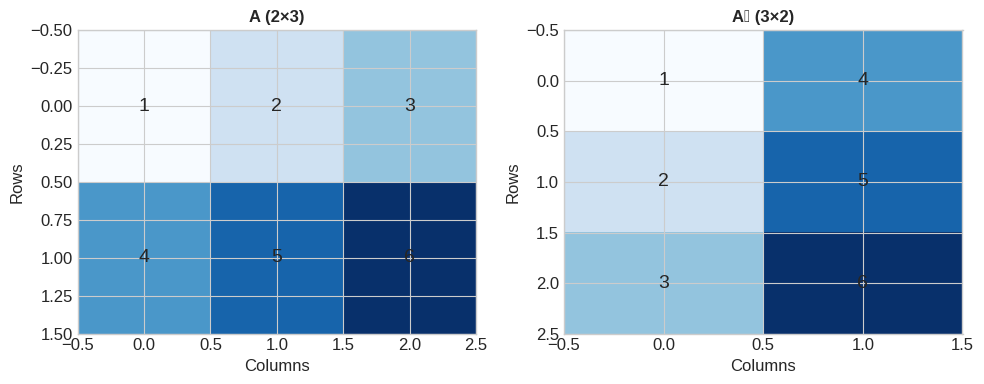


💡 Notice: Rows of A become columns of Aᵀ!


In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Transpose
A = np.array([[1, 2, 3],
              [4, 5, 6]])  # 2×3

A_T = A.T  # or np.transpose(A)

print("🔄 Matrix Transpose")
print("="*40)
print(f"A (shape {A.shape}):")
print(A)
print(f"\nAᵀ (shape {A_T.shape}):")
print(A_T)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

im0 = axes[0].imshow(A, cmap='Blues', aspect='auto')
axes[0].set_title(f'A (2×3)', fontsize=12, fontweight='bold')
for i in range(2):
    for j in range(3):
        axes[0].text(j, i, f'{A[i,j]}', ha='center', va='center', fontsize=14)
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Rows')

im1 = axes[1].imshow(A_T, cmap='Blues', aspect='auto')
axes[1].set_title(f'Aᵀ (3×2)', fontsize=12, fontweight='bold')
for i in range(3):
    for j in range(2):
        axes[1].text(j, i, f'{A_T[i,j]}', ha='center', va='center', fontsize=14)
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Rows')

plt.tight_layout()
plt.show()

print("\n💡 Notice: Rows of A become columns of Aᵀ!")

🧠 Attention Mechanism: Q @ Kᵀ
Q (queries) - shape (4, 3):
[[ 0.5  -0.14  0.65]
 [ 1.52 -0.23 -0.23]
 [ 1.58  0.77 -0.47]
 [ 0.54 -0.46 -0.47]]

K (keys) - shape (4, 3):
[[ 0.24 -1.91 -1.72]
 [-0.56 -1.01  0.31]
 [-0.91 -1.41  1.47]
 [-0.23  0.07 -1.42]]

Kᵀ (keys transposed) - shape (3, 4):
[[ 0.24 -0.56 -0.91 -0.23]
 [-1.91 -1.01 -1.41  0.07]
 [-1.72  0.31  1.47 -1.42]]

Attention scores (Q @ Kᵀ) - shape (4, 4):
[[-0.73  0.06  0.7  -1.05]
 [ 1.2  -0.69 -1.4  -0.04]
 [-0.28 -1.81 -3.21  0.36]
 [ 1.82  0.02 -0.53  0.51]]


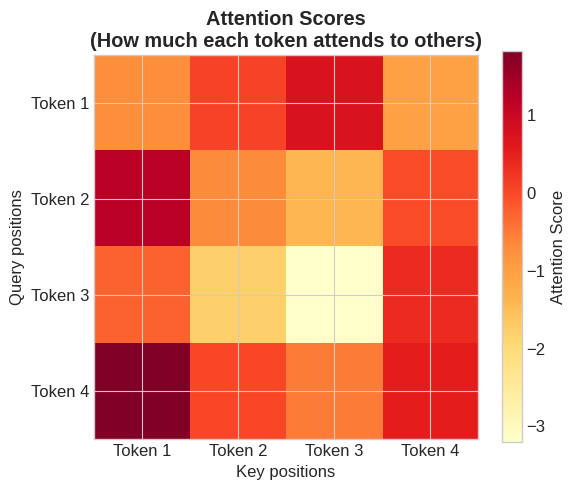


💡 This is the foundation of Transformers (GPT, BERT, etc.)!
   Each token learns which other tokens to 'pay attention to'.


In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Deep Learning: Attention Mechanism uses Transpose!
np.random.seed(42)

seq_len = 4  # 4 tokens in sequence
d_k = 3      # dimension of keys

# Query and Key matrices (simplified)
Q = np.random.randn(seq_len, d_k).round(2)  # What am I looking for?
K = np.random.randn(seq_len, d_k).round(2)  # What do I contain?

# Attention scores: how much each token attends to others
# scores = Q @ Kᵀ (transpose is crucial!)
scores = Q @ K.T  # shape: (seq_len, seq_len)

print("🧠 Attention Mechanism: Q @ Kᵀ")
print("="*50)
print(f"Q (queries) - shape {Q.shape}:")
print(Q)
print(f"\nK (keys) - shape {K.shape}:")
print(K)
print(f"\nKᵀ (keys transposed) - shape {K.T.shape}:")
print(K.T)
print(f"\nAttention scores (Q @ Kᵀ) - shape {scores.shape}:")
print(scores.round(2))

# Visualize attention
plt.figure(figsize=(6, 5))
plt.imshow(scores, cmap='YlOrRd')
plt.colorbar(label='Attention Score')
plt.xlabel('Key positions')
plt.ylabel('Query positions')
plt.title('Attention Scores\n(How much each token attends to others)', fontweight='bold')
plt.xticks(range(4), ['Token 1', 'Token 2', 'Token 3', 'Token 4'])
plt.yticks(range(4), ['Token 1', 'Token 2', 'Token 3', 'Token 4'])
plt.tight_layout()
plt.show()

print("\n💡 This is the foundation of Transformers (GPT, BERT, etc.)!")
print("   Each token learns which other tokens to 'pay attention to'.")

### 🔃 Matrix Inverse (Undo a transformation)

The inverse `A⁻¹` satisfies: `A @ A⁻¹ = I` (identity matrix)

**Note**: Inverses are rarely computed directly in deep learning (too expensive!). Instead we use optimization algorithms. But understanding them helps with theory.

In [63]:
import numpy as np

# Matrix Inverse
A = np.array([[4, 7],
              [2, 6]])

A_inv = np.linalg.inv(A)
identity = A @ A_inv

print("🔃 Matrix Inverse")
print("="*40)
print(f"A:")
print(A)
print(f"\nA⁻¹ (inverse):")
print(A_inv.round(4))
print(f"\nA @ A⁻¹ (should be identity):")
print(identity.round(10))

# Show it's the identity matrix
print("\n✅ The result is the identity matrix I:")
print("   [[1, 0],")
print("    [0, 1]]")

🔃 Matrix Inverse
A:
[[4 7]
 [2 6]]

A⁻¹ (inverse):
[[ 0.6 -0.7]
 [-0.2  0.4]]

A @ A⁻¹ (should be identity):
[[ 1. -0.]
 [ 0.  1.]]

✅ The result is the identity matrix I:
   [[1, 0],
    [0, 1]]


### 📏 Determinant (Volume scaling factor)

The determinant tells you how much a matrix scales space:
- `det(A) > 0`: Preserves orientation, scales by |det|
- `det(A) < 0`: Flips orientation
- `det(A) = 0`: Matrix squashes to lower dimension (NOT invertible!)

**In deep learning**: Normalizing Flows use determinants to ensure transformations are invertible.

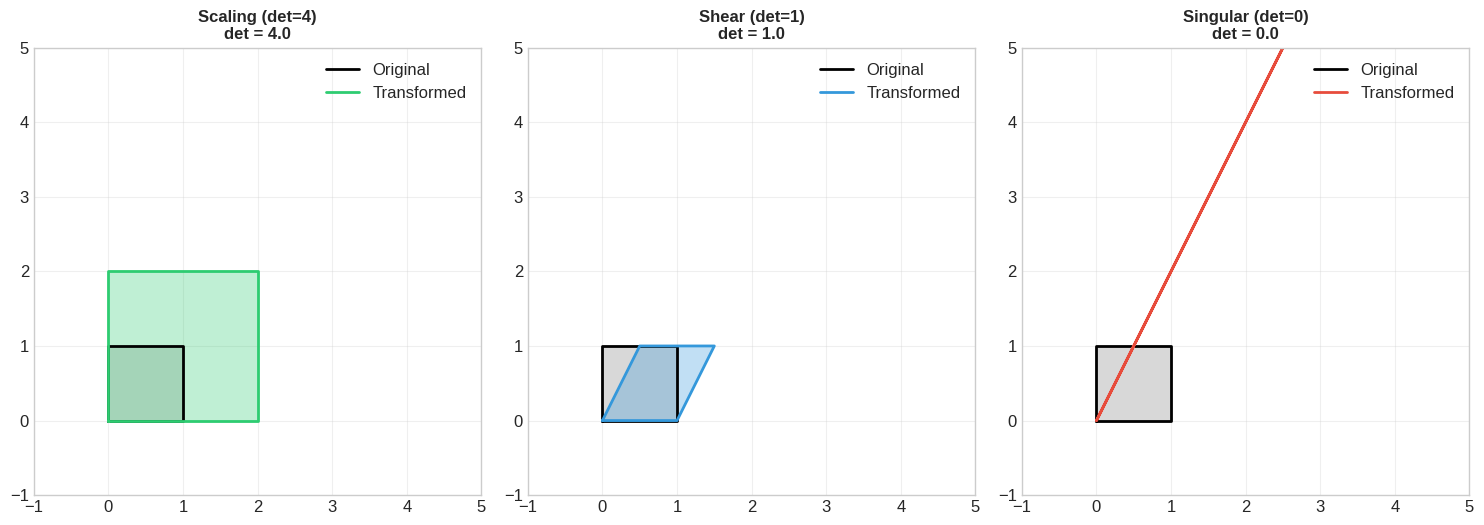

💡 Key Insight:
   det = 4 → Area multiplied by 4
   det = 1 → Area preserved (just shape changed)
   det = 0 → Collapsed to a line (lost dimension!)


In [64]:
# Determinant visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original unit square
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).T

# Three different transformations
matrices = [
    np.array([[2, 0], [0, 2]]),    # Scaling (det = 4)
    np.array([[1, 0.5], [0, 1]]),  # Shear (det = 1)
    np.array([[1, 2], [2, 4]])     # Singular (det = 0)
]
titles = ['Scaling (det=4)', 'Shear (det=1)', 'Singular (det=0)']
colors = ['#2ecc71', '#3498db', '#e74c3c']

for ax, M, title, color in zip(axes, matrices, titles, colors):
    # Draw original square
    ax.plot(square[0], square[1], 'k-', linewidth=2, label='Original')
    ax.fill(square[0], square[1], alpha=0.3, color='gray')

    # Transform and draw
    transformed = M @ square
    ax.plot(transformed[0], transformed[1], '-', linewidth=2, color=color, label='Transformed')
    ax.fill(transformed[0], transformed[1], alpha=0.3, color=color)

    det = np.linalg.det(M)
    ax.set_title(f'{title}\ndet = {det:.1f}', fontsize=12, fontweight='bold')
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

print("💡 Key Insight:")
print("   det = 4 → Area multiplied by 4")
print("   det = 1 → Area preserved (just shape changed)")
print("   det = 0 → Collapsed to a line (lost dimension!)")

---

✅ **Section 5 Complete!** You now understand:
- **Transpose**: Essential for attention and backpropagation
- **Inverse**: Undoes transformations (used in theory)
- **Determinant**: Measures volume scaling

Next up: **Eigenvalues & Eigenvectors** - understanding matrix behavior!

---

## 6️⃣ Eigenvalues and Eigenvectors

Eigenvalues/eigenvectors reveal the "soul" of a matrix - its fundamental behavior.

**Definition**: For matrix A, if `A @ v = λ @ v` where:
- **v** is an eigenvector (direction that doesn't change)
- **λ** is an eigenvalue (how much it scales)

**In deep learning**:
- **PCA**: Eigenvectors of covariance matrix = principal components
- **Stability**: Eigenvalues determine if gradients explode/vanish
- **Spectral normalization**: Control eigenvalues for stable training

In [65]:
import numpy as np

# Eigenvalues and Eigenvectors
A = np.array([[3, 1],
              [1, 3]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("🔍 Eigenvalues and Eigenvectors")
print("="*40)
print(f"Matrix A:")
print(A)
print(f"\nEigenvalues: {eigenvalues}")
print(f"\nEigenvectors (as columns):")
print(eigenvectors)

# Verify: A @ v = λ * v
print("\n✅ Verification: A @ v = λ * v")
for i in range(2):
    v = eigenvectors[:, i]
    lam = eigenvalues[i]
    Av = A @ v
    lam_v = lam * v
    print(f"\nEigenvector {i+1}: {v}")
    print(f"  A @ v     = {Av}")
    print(f"  λ * v     = {lam_v}")
    print(f"  Match: {np.allclose(Av, lam_v)}")

🔍 Eigenvalues and Eigenvectors
Matrix A:
[[3 1]
 [1 3]]

Eigenvalues: [4. 2.]

Eigenvectors (as columns):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

✅ Verification: A @ v = λ * v

Eigenvector 1: [0.70710678 0.70710678]
  A @ v     = [2.82842712 2.82842712]
  λ * v     = [2.82842712 2.82842712]
  Match: True

Eigenvector 2: [-0.70710678  0.70710678]
  A @ v     = [-1.41421356  1.41421356]
  λ * v     = [-1.41421356  1.41421356]
  Match: True


In [66]:
# Vector Norms
v = np.array([3, -4, 0, 5])

# L1 norm (Manhattan distance)
l1 = np.linalg.norm(v, ord=1)

# L2 norm (Euclidean distance) - most common!
l2 = np.linalg.norm(v, ord=2)  # or just np.linalg.norm(v)

# L-infinity norm (maximum absolute value)
linf = np.linalg.norm(v, ord=np.inf)

print("📏 Vector Norms")
print("="*40)
print(f"Vector v = {v}")
print(f"\nL1 norm (Manhattan):  |3| + |-4| + |0| + |5| = {l1}")
print(f"L2 norm (Euclidean):  √(3² + 4² + 0² + 5²) = √{3**2 + 4**2 + 0**2 + 5**2} = {l2:.2f}")
print(f"L∞ norm (Max):        max(|3|, |-4|, |0|, |5|) = {linf}")

📏 Vector Norms
Vector v = [ 3 -4  0  5]

L1 norm (Manhattan):  |3| + |-4| + |0| + |5| = 12.0
L2 norm (Euclidean):  √(3² + 4² + 0² + 5²) = √50 = 7.07
L∞ norm (Max):        max(|3|, |-4|, |0|, |5|) = 5.0


---

✅ **Section 6 Complete!** You now understand:
- Eigenvalues and eigenvectors definition
- How they reveal matrix behavior
- Application in PCA for dimensionality reduction

Next up: **Norms and Distances** - measuring vectors!

---

## 7️⃣ Norms and Distances

Norms measure the "size" of vectors. Distances measure how far apart they are. Both are essential for loss functions and regularization!

| Norm | Formula | Deep Learning Use |
|------|---------|-------------------|
| **L1** | Σ\|xᵢ\| | Sparsity, feature selection |
| **L2** | √(Σxᵢ²) | Most common! Euclidean distance |
| **L∞** | max(\|xᵢ\|) | Adversarial robustness |

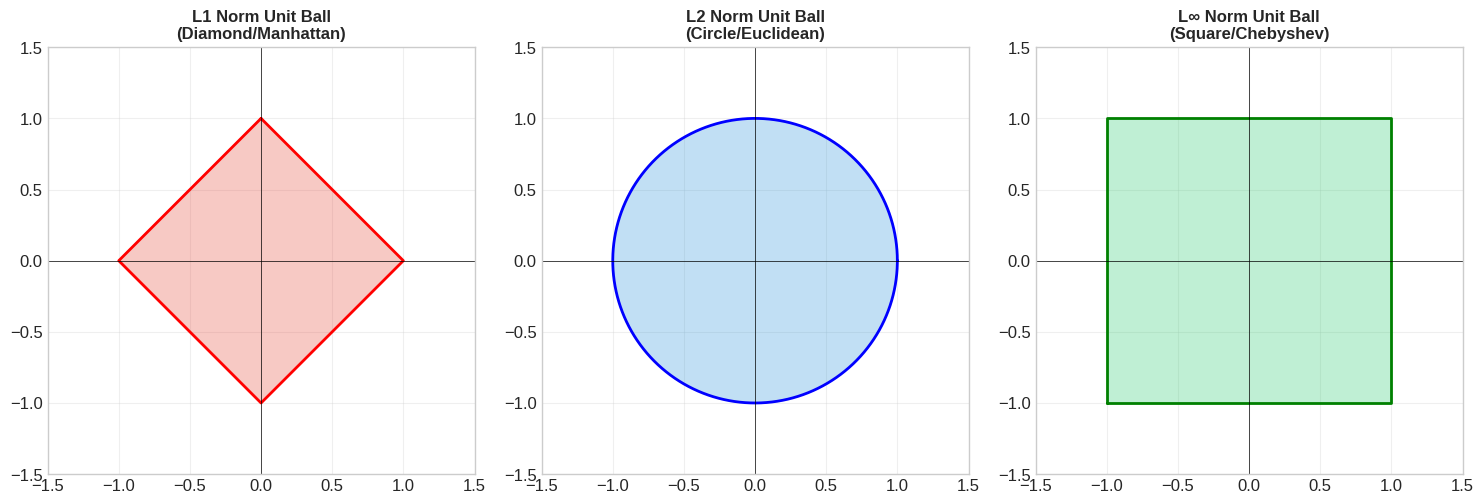


💡 Key Insight: The 'unit ball' shows all points with norm = 1
   L1 encourages sparsity (solutions hit corners = zeros)
   L2 shrinks all weights evenly


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Visualizing norm "unit balls" - all points with norm = 1
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

theta = np.linspace(0, 2*np.pi, 1000)

# L1 unit ball (diamond)
ax1 = axes[0]
l1_x = np.concatenate([np.linspace(0, 1, 250), np.linspace(1, 0, 250),
                       np.linspace(0, -1, 250), np.linspace(-1, 0, 250)])
l1_y = np.concatenate([np.linspace(1, 0, 250), np.linspace(0, -1, 250),
                       np.linspace(-1, 0, 250), np.linspace(0, 1, 250)])
ax1.fill(l1_x, l1_y, alpha=0.3, color='#e74c3c')
ax1.plot(l1_x, l1_y, 'r-', linewidth=2)
ax1.set_title('L1 Norm Unit Ball\n(Diamond/Manhattan)', fontsize=12, fontweight='bold')

# L2 unit ball (circle)
ax2 = axes[1]
l2_x = np.cos(theta)
l2_y = np.sin(theta)
ax2.fill(l2_x, l2_y, alpha=0.3, color='#3498db')
ax2.plot(l2_x, l2_y, 'b-', linewidth=2)
ax2.set_title('L2 Norm Unit Ball\n(Circle/Euclidean)', fontsize=12, fontweight='bold')

# L-infinity unit ball (square)
ax3 = axes[2]
linf_x = [-1, 1, 1, -1, -1]
linf_y = [-1, -1, 1, 1, -1]
ax3.fill(linf_x, linf_y, alpha=0.3, color='#2ecc71')
ax3.plot(linf_x, linf_y, 'g-', linewidth=2)
ax3.set_title('L∞ Norm Unit Ball\n(Square/Chebyshev)', fontsize=12, fontweight='bold')

for ax in axes:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: The 'unit ball' shows all points with norm = 1")
print("   L1 encourages sparsity (solutions hit corners = zeros)")
print("   L2 shrinks all weights evenly")

/tmp/ipython-input-737351095.py:78: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


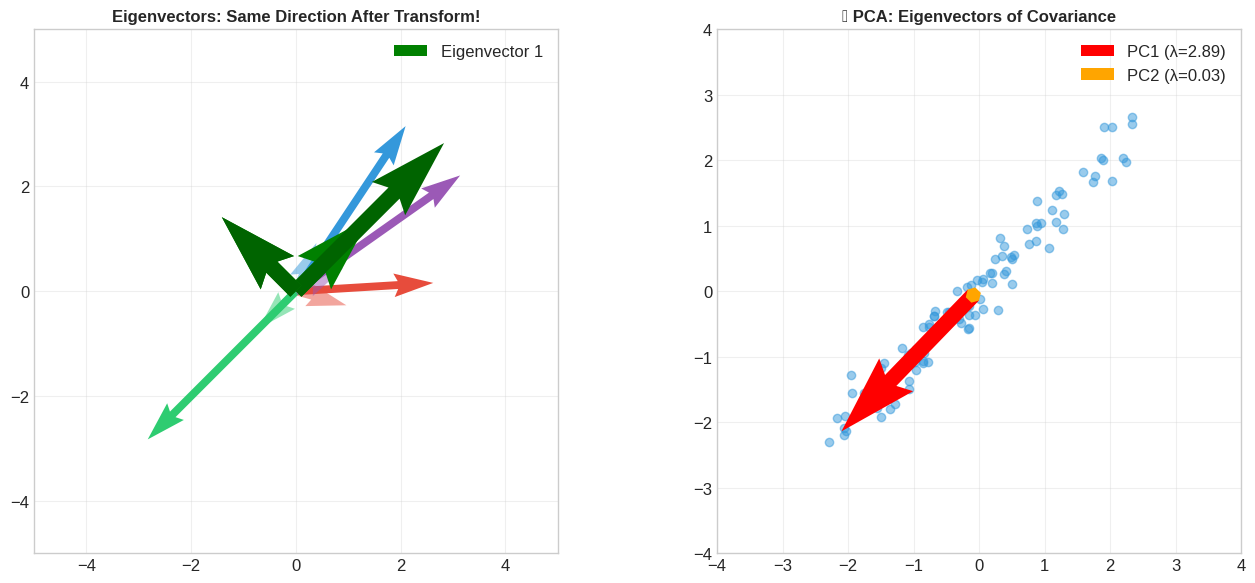


💡 Key Insight:
   - Eigenvectors point in directions that the matrix ONLY scales (no rotation)
   - Eigenvalues tell you HOW MUCH it scales in that direction
   - PCA uses this to find the directions of maximum variance!


In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrix A and compute its eigenvalues and eigenvectors
A = np.array([[3, 1],
              [1, 3]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Visualizing Eigenvectors: Directions that don't change!
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Show eigenvectors are special directions
ax1 = axes[0]
colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6']

# Draw some random vectors and their transformations
np.random.seed(42)
for i in range(4):
    v = np.random.randn(2)
    v = v / np.linalg.norm(v)  # Normalize
    Av = A @ v

    ax1.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1,
               color=colors[i], width=0.015, alpha=0.5)
    ax1.quiver(0, 0, Av[0], Av[1], angles='xy', scale_units='xy', scale=1,
               color=colors[i], width=0.015)

# Draw eigenvectors (these don't change direction!)
for i, color in enumerate(['black', 'black']):
    v = eigenvectors[:, i]
    Av = A @ v
    ax1.quiver(0, 0, v[0]*2, v[1]*2, angles='xy', scale_units='xy', scale=1,
               color='green', width=0.03, label=f'Eigenvector {i+1}' if i==0 else '')
    ax1.quiver(0, 0, Av[0], Av[1], angles='xy', scale_units='xy', scale=1,
               color='darkgreen', width=0.03, linestyle='--')

ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_title('Eigenvectors: Same Direction After Transform!', fontsize=12, fontweight='bold')
ax1.legend()

# Right: PCA example
ax2 = axes[1]
# Generate correlated data
np.random.seed(42)
data = np.random.randn(100, 2)
data = data @ np.array([[1, 0.8], [0.8, 1]])  # Add correlation

# Compute covariance and eigenvectors
cov = np.cov(data.T)
eig_vals, eig_vecs = np.linalg.eig(cov)

# Sort by eigenvalue
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

ax2.scatter(data[:, 0], data[:, 1], alpha=0.5, c='#3498db')

# Draw principal components
mean = np.mean(data, axis=0)
for i, (val, vec, color) in enumerate(zip(eig_vals, eig_vecs.T, ['red', 'orange'])):
    ax2.quiver(mean[0], mean[1], vec[0]*val, vec[1]*val,
               angles='xy', scale_units='xy', scale=1, color=color, width=0.03,
               label=f'PC{i+1} (λ={val:.2f})')

ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_title('🧠 PCA: Eigenvectors of Covariance', fontsize=12, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n💡 Key Insight:")
print("   - Eigenvectors point in directions that the matrix ONLY scales (no rotation)")
print("   - Eigenvalues tell you HOW MUCH it scales in that direction")
print("   - PCA uses this to find the directions of maximum variance!")

In [69]:
# Deep Learning Application: Regularization
print("🧠 Regularization: Preventing Overfitting with Norms")
print("="*55)

# Simulated weight matrix
W = np.array([
    [0.5, -0.3, 0.8],
    [0.1, 0.9, -0.2],
    [-0.6, 0.4, 0.7]
])

# L1 regularization (Lasso)
l1_reg = np.sum(np.abs(W))

# L2 regularization (Ridge) - typically squared
l2_reg = np.sum(W ** 2)

# Frobenius norm (matrix L2)
frobenius = np.linalg.norm(W, 'fro')

print(f"Weight matrix W:")
print(W)
print(f"\nL1 regularization (sum of |w|):     {l1_reg:.3f}")
print(f"L2 regularization (sum of w²):      {l2_reg:.3f}")
print(f"Frobenius norm (√sum of w²):        {frobenius:.3f}")

print("\n📊 Loss function with regularization:")
print("   Total Loss = Data Loss + λ × Regularization")
print("   L1: Pushes weights to exactly ZERO (sparse)")
print("   L2: Pushes weights to be SMALL (weight decay)")

🧠 Regularization: Preventing Overfitting with Norms
Weight matrix W:
[[ 0.5 -0.3  0.8]
 [ 0.1  0.9 -0.2]
 [-0.6  0.4  0.7]]

L1 regularization (sum of |w|):     4.500
L2 regularization (sum of w²):      2.850
Frobenius norm (√sum of w²):        1.688

📊 Loss function with regularization:
   Total Loss = Data Loss + λ × Regularization
   L1: Pushes weights to exactly ZERO (sparse)
   L2: Pushes weights to be SMALL (weight decay)


---

✅ **Section 7 Complete!** You now understand:
- L1, L2, and L∞ norms
- How they measure vector "size"
- Application in regularization (weight decay)

Now let's wrap up with a summary!

---

## 🎓 Summary: Linear Algebra for Deep Learning

Congratulations! You've learned the essential linear algebra for deep learning!

### Quick Reference

| Concept | NumPy | Deep Learning Use |
|---------|-------|-------------------|
| Vector | `np.array([1,2,3])` | Features, embeddings |
| Matrix | `np.array([[1,2],[3,4]])` | Weights, batches |
| Dot product | `a @ b` or `np.dot(a,b)` | Neuron activation |
| Matrix multiply | `A @ B` | Layer transformation |
| Transpose | `A.T` | Attention, backprop |
| Norm | `np.linalg.norm(x)` | Regularization |
| Eigenvalues | `np.linalg.eig(A)` | PCA, analysis |

### The Core Equation of Deep Learning

```
Y = activation(X @ W + b)
```

Where:
- `X`: Input batch (samples × features)
- `W`: Weight matrix (features × outputs)  
- `b`: Bias vector (outputs)
- `Y`: Output (samples × outputs)

In [70]:
import numpy as np

# Putting it all together: A complete neural network forward pass!
np.random.seed(42)

# Network architecture: 4 inputs → 8 hidden → 3 outputs
n_samples = 5
n_inputs = 4
n_hidden = 8
n_outputs = 3

# Initialize weights (He initialization for ReLU)
W1 = np.random.randn(n_inputs, n_hidden) * np.sqrt(2/n_inputs)
b1 = np.zeros(n_hidden)
W2 = np.random.randn(n_hidden, n_outputs) * np.sqrt(2/n_hidden)
b2 = np.zeros(n_outputs)

# Input batch
X = np.random.randn(n_samples, n_inputs)

# Forward pass!
print("🚀 Complete Neural Network Forward Pass")
print("="*55)
print(f"Input X shape: {X.shape}")

# Layer 1: Linear + ReLU
Z1 = X @ W1 + b1           # Linear transformation
A1 = np.maximum(0, Z1)     # ReLU activation
print(f"After Layer 1: {Z1.shape} → ReLU → {A1.shape}")

# Layer 2: Linear + Softmax
Z2 = A1 @ W2 + b2          # Linear transformation
# Softmax for probabilities
exp_Z2 = np.exp(Z2 - np.max(Z2, axis=1, keepdims=True))  # Numerical stability
A2 = exp_Z2 / np.sum(exp_Z2, axis=1, keepdims=True)
print(f"After Layer 2: {Z2.shape} → Softmax → {A2.shape}")

print(f"\n✅ Output (class probabilities for {n_samples} samples):")
print(A2.round(3))
print(f"\nPredicted classes: {np.argmax(A2, axis=1)}")

print("\n🎉 That's it! Every neural network layer is just:")
print("   1. Matrix multiplication (X @ W)")
print("   2. Bias addition (+ b)")
print("   3. Activation function (ReLU, Softmax, etc.)")

🚀 Complete Neural Network Forward Pass
Input X shape: (5, 4)
After Layer 1: (5, 8) → ReLU → (5, 8)
After Layer 2: (5, 3) → Softmax → (5, 3)

✅ Output (class probabilities for 5 samples):
[[0.356 0.396 0.247]
 [0.221 0.268 0.511]
 [0.283 0.476 0.241]
 [0.402 0.4   0.197]
 [0.219 0.27  0.512]]

Predicted classes: [1 2 1 0 2]

🎉 That's it! Every neural network layer is just:
   1. Matrix multiplication (X @ W)
   2. Bias addition (+ b)
   3. Activation function (ReLU, Softmax, etc.)


---

## 🎯 What's Next?

Now that you understand the linear algebra foundations, you're ready to:

1. **Learn Calculus for Deep Learning** - Understand backpropagation and gradients
2. **Learn Probability for Deep Learning** - Understand loss functions and uncertainty
3. **Build Neural Networks from Scratch** - Implement everything you've learned!

### Key Takeaways

1. **Vectors and matrices** are the data structures of deep learning
2. **Matrix multiplication** is the core operation (X @ W)
3. **Dot products** measure similarity and drive attention mechanisms
4. **Transpose** is essential for backpropagation
5. **Norms** measure size and enable regularization
6. **Eigenvalues** reveal fundamental matrix properties

**You now have the mathematical foundation for deep learning!** 🚀

---
*Created with ❤️ for Introduction to Deep Neural Networks*